## Supernova distances and redshifts (part 1)

Measuring the cosmological relationship between distance and redshift is at the heart of the entire field of cosmology and allowed, among other things, the discovery of dark energy! At high redshifts, this is done with Type Ia Supernova which are standard (or better, standardizable) candles.

Let's recall the definition of magnitude and the distance modulus (ah! the astronomers...)

$$
\mu = m-M =  5 \log_{10}\left(\frac{d_L}{\rm pc}\right) - 5
$$

Here is the Hubble diagram for Type Ia supernovae (which are standard candels). The lines show the predictions for cosmologies with varying amounts of Ωm and ΩΛ. The observed points all lie above the line for a universe with zero Λ. The lower panel, with the slope caused by the inverse square law taken out, shows the difference between the predictions more clearly and shows why a model with ΩΛ > 0 is favored. 

####  Tasks

- First, explore fitting this data with the tecniques we have seen.
- Start from linear regression and polynomial regression
- For the case of  polynomial regression, just fit many of them for now.
- Let's bet based on intuition! Which fit is the best?
- In what cases are you underfitting the data?
- In what cases are you overfitting the data?
- Now split the data into training and validation sets
- Implement a cross-validation procedure
- Pick the best!
- Does it agree with our bets?

#### OPTIONAL
- Repeat with Basis Function Regression and Kernel Regression
- Explore what happens when you change the number of datapoints and plot the resulting learning curves.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astroML.datasets import generate_mu_z
from sklearn.linear_model import LinearRegression
from astroML.linear_model import PolynomialRegression
import seaborn as sns
import tqdm 
from sklearn.model_selection import learning_curve

/Users/riccardobosonidemartini/Documents/.venv311/lib/python3.11/site-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


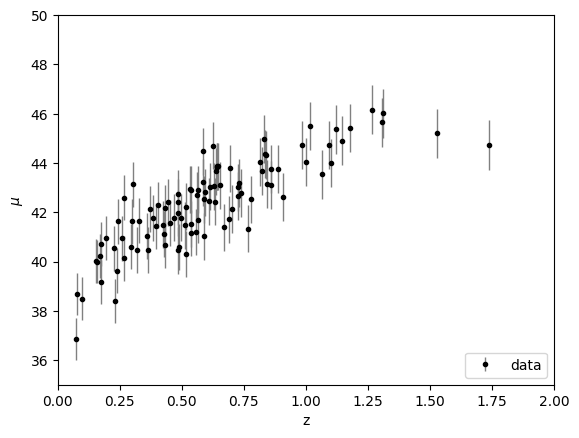

In [2]:
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234) # YOU CANNOT CHANGE THIS

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50);

## linear regression

intercept: 39.56505554722625, coefficiente: [4.64711848]


/var/folders/dm/sy7c98fx7rl_tb_zs0mdpsj40000gn/T/ipykernel_60378/2904620969.py:38: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  axes[1].plot(train_sizes, -test_scores_linreg.mean(1), 'o-', markersize=4, linestyle="--", color="teal", label="validation")


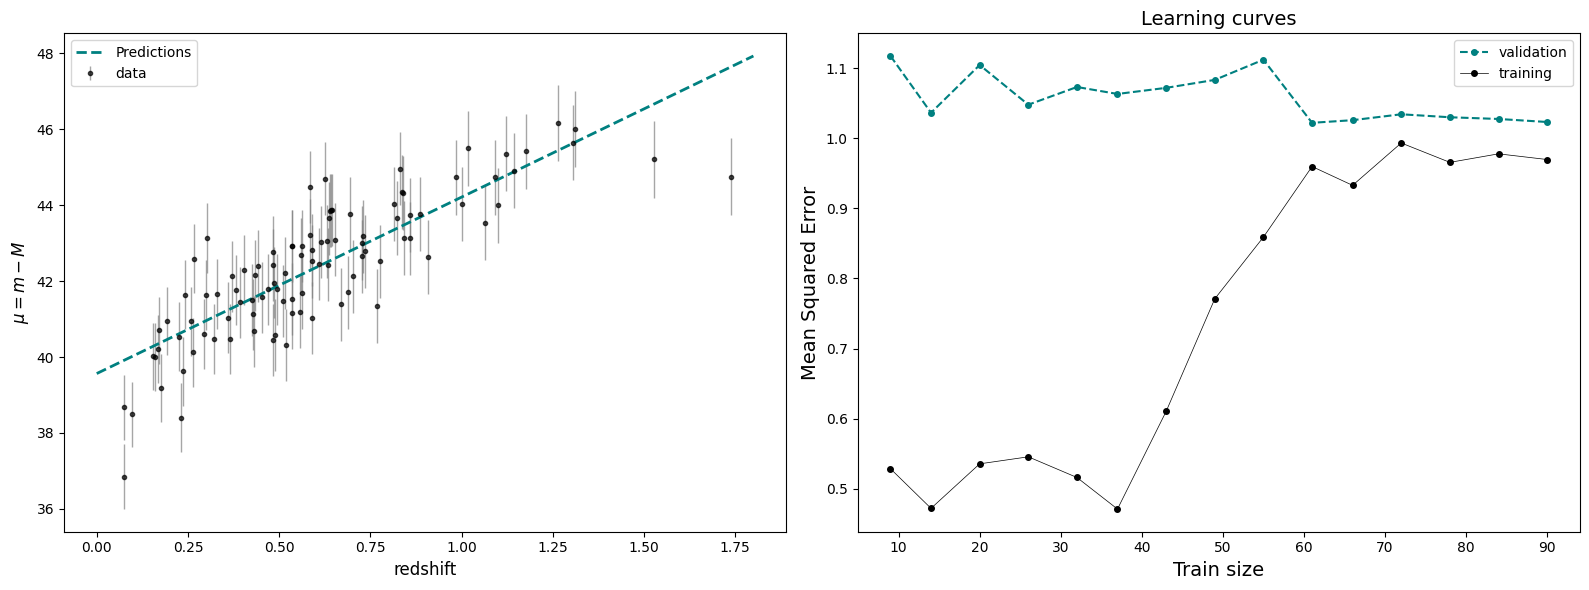

In [10]:
x_grid_1d = np.linspace(0,1.8, 100)
x_grid = x_grid_1d[:, np.newaxis]


x = z_sample[:, np.newaxis]
y = mu_sample

lin_reg = LinearRegression()
lin_reg.fit(x, y, sample_weight=1.0)

theta0 = lin_reg.intercept_
theta1 = lin_reg.coef_

print(f"intercept: {theta0}, coefficiente: {theta1}")
y_pred2 = lin_reg.predict(x_grid)


y_pred = theta0 + theta1*x_grid  # Complete 
fig, axes = plt.subplots(1, 2, figsize=(16, 6))



train_sizes, train_scores_linreg, test_scores_linreg = \ #test_scores_linreg: For each training size, how well the model predicts new data
    learning_curve(lin_reg, x, y, train_sizes=np.linspace(0.1, 1, 15), \
    scoring="neg_mean_squared_error", cv=10)
#crea 15 valori tra 0.1 e 1.0, cioè dal 10% al 100% dei dati.
#In ciascun punto, learning_curve allena il modello con quella frazione di dati e ne misura le prestazioni.


# plot 1: Linear Regression Predictions
axes[0].errorbar(x, y, dmu, fmt='.k', ecolor='gray', alpha=0.7, lw=1, label='data')
axes[0].plot(x_grid, y_pred, color="teal", linestyle="--", linewidth=2, label="Predictions")
axes[0].set_xlabel("redshift", fontsize=12)
axes[0].set_ylabel("$\mu = m-M$", fontsize=12)
axes[0].legend(loc="upper left", fontsize=10)

# plot 2: Learning Curves
axes[1].plot(train_sizes, -test_scores_linreg.mean(1), 'o-', markersize=4, linestyle="--", color="teal", label="validation")
axes[1].plot(train_sizes, -train_scores_linreg.mean(1), 'o-', markersize=4, color="black", linewidth=0.5, label="training")
axes[1].set_xlabel("Train size", fontsize=14)
axes[1].set_ylabel("Mean Squared Error", fontsize=14)
axes[1].set_title('Learning curves', fontsize=14)
axes[1].legend(loc="best")

plt.tight_layout()
plt.show()

## polynomial regression

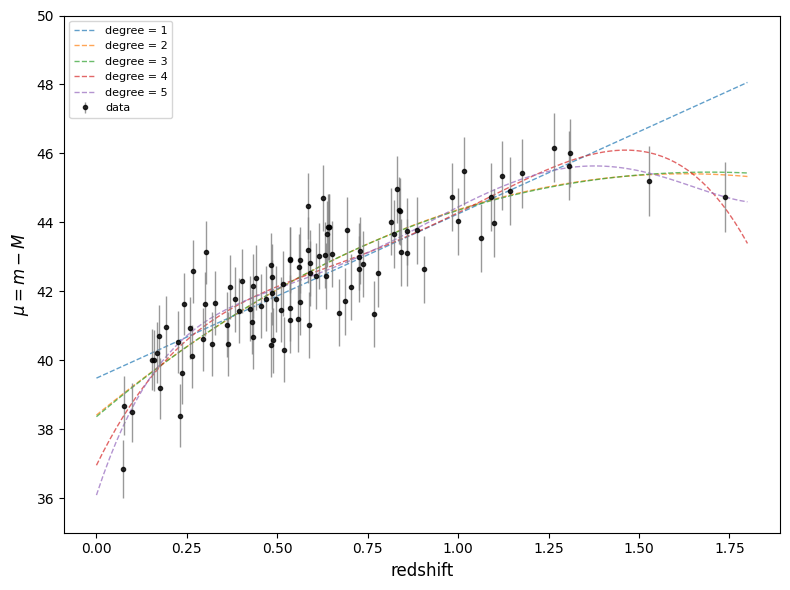

In [11]:
plt.figure(figsize=(8, 6))

for degree in range(1, 6):
    model = PolynomialRegression(degree)
    model.fit(x, y, dmu)
    y_pred = model.predict(x_grid)
    plt.plot(x_grid, y_pred, linestyle="--", alpha=0.7, linewidth=1, label=f"degree = {degree}")

# Dati sperimentali con barre d’errore
plt.errorbar(x, y, dmu, fmt='.k', ecolor='gray', alpha=0.8, lw=1, label='data')

# Etichette, limiti e legenda
plt.xlabel("redshift", fontsize=12)
plt.ylabel(r"$\mu = m - M$", fontsize=12)
plt.ylim(35, 50)
plt.legend(loc="upper left", fontsize=8)
plt.tight_layout()
plt.show()

it seems like a polynomial model of third degree could be a good choice

/var/folders/dm/sy7c98fx7rl_tb_zs0mdpsj40000gn/T/ipykernel_60378/1456483344.py:12: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(train_sizes, -test_scores_linreg.mean(1), 'o-', markersize=4, linestyle="--", color="teal", label="validation")


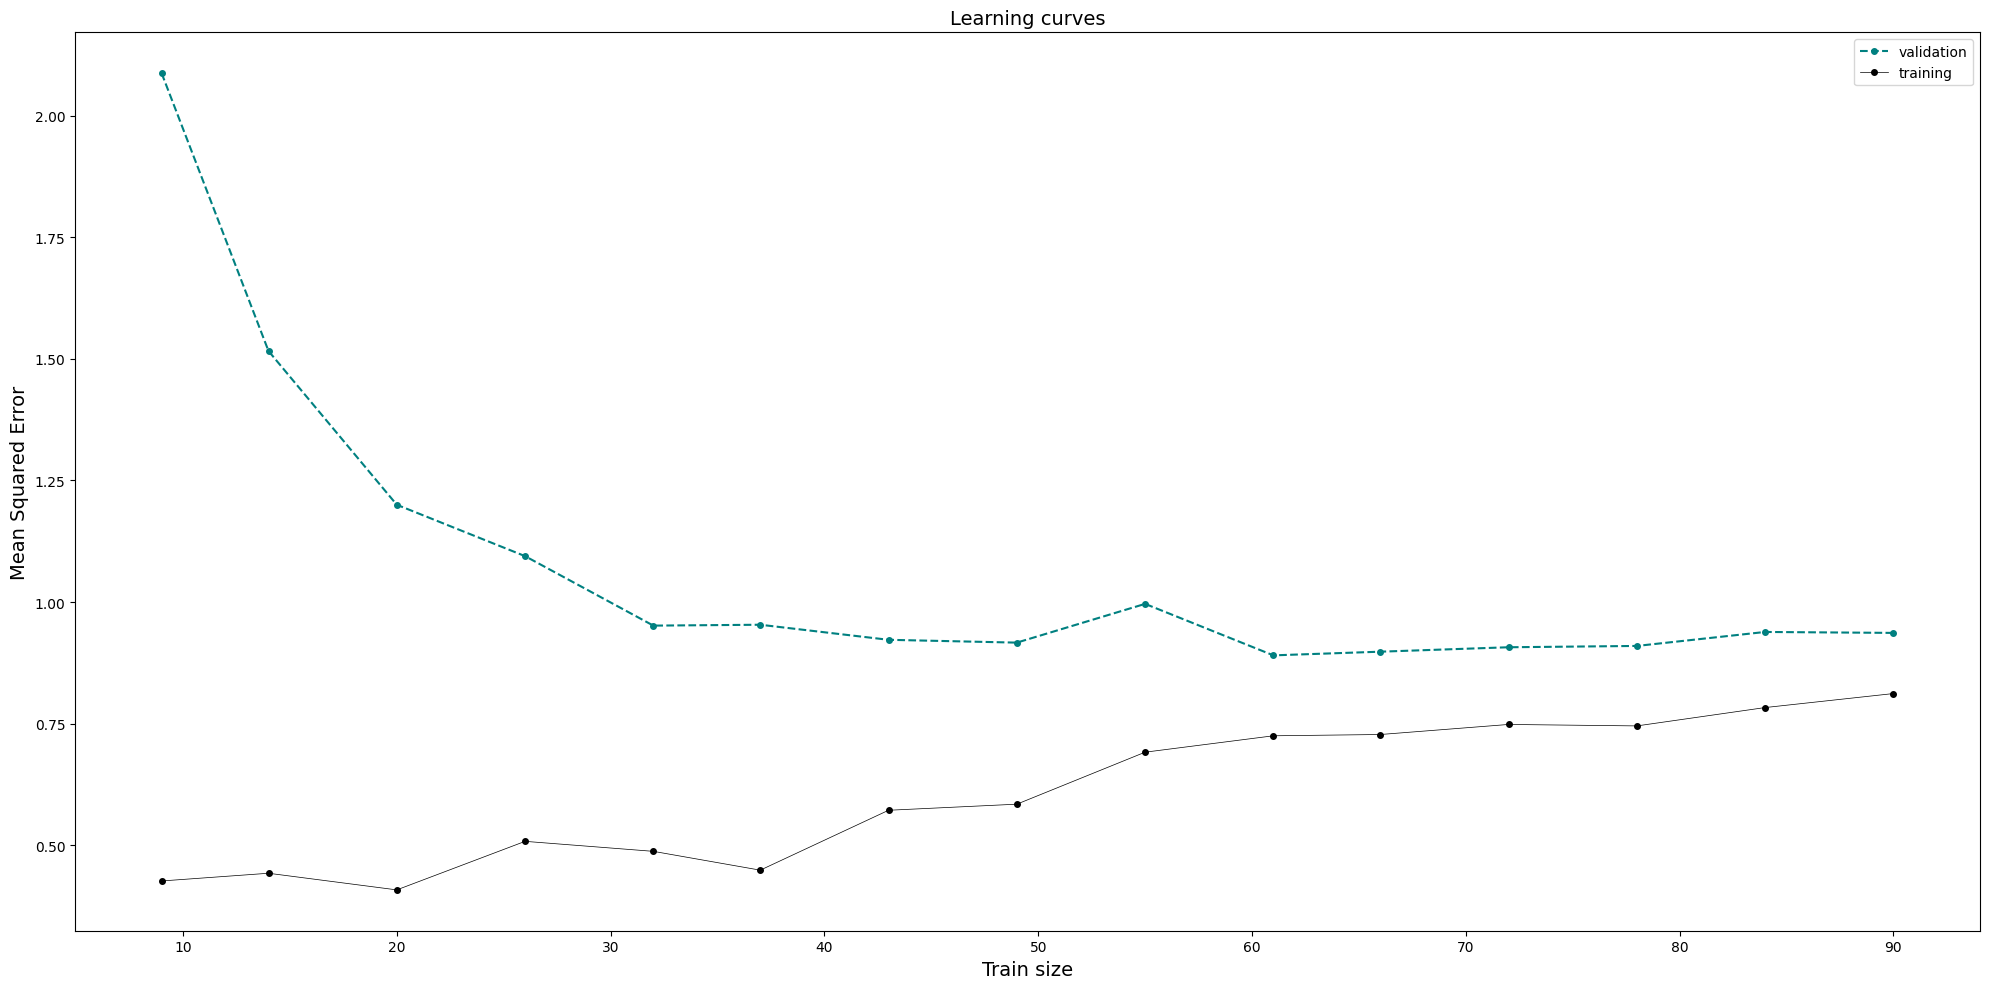

In [12]:
# Plot 2: Learning curves, using a third degree polynomial

# (non usiamo plt.subplots)
plt.figure(figsize=(20, 10))

pol_reg = PolynomialRegression(3)
train_sizes, train_scores_linreg, test_scores_linreg = \
    learning_curve(pol_reg, x, y, train_sizes=np.linspace(0.1, 1, 15), \
    scoring="neg_mean_squared_error", cv=10)

# Tracciamo direttamente su plt
plt.plot(train_sizes, -test_scores_linreg.mean(1), 'o-', markersize=4, linestyle="--", color="teal", label="validation")
plt.plot(train_sizes, -train_scores_linreg.mean(1), 'o-', markersize=4, color="black", linewidth=0.5, label="training")

plt.xlabel("Train size", fontsize=14)
plt.ylabel("Mean Squared Error", fontsize=14)
plt.title('Learning curves', fontsize=14)
plt.legend(loc="best")

plt.tight_layout()
plt.show()

- In what cases are you underfitting the data?
- In what cases are you overfitting the data?

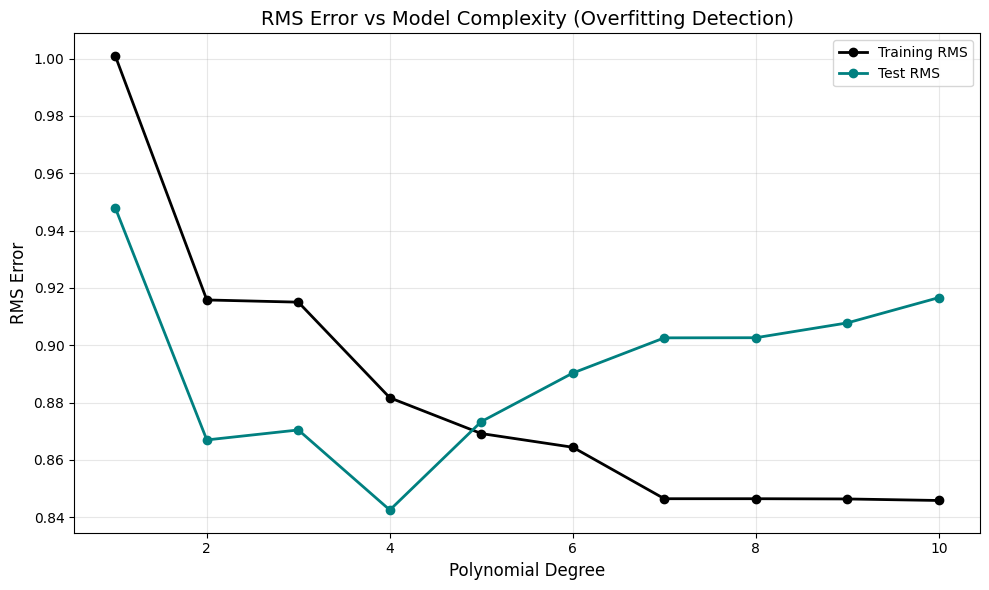


Best polynomial degree (minimum test RMS): 4
Test RMS at best degree: 0.8425


In [30]:
# Plot 3: RMS error as a function of polynomial degree to detect overfitting

degrees = range(1, 11)  # Test degrees from 1 to 10
train_rms = []
test_rms = []

# Split data into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, dmu_train, dmu_test = train_test_split(
    x, y, dmu, test_size=0.2, random_state=4
)

for degree in degrees:
    model = PolynomialRegression(degree)
    model.fit(x_train, y_train, dmu_train)
    
    # Predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Calculate RMS errors
    train_rms.append(np.sqrt(np.mean((y_train - y_train_pred)**2)))
    test_rms.append(np.sqrt(np.mean((y_test - y_test_pred)**2)))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_rms, 'o-', markersize=6, color='black', linewidth=2, label='Training RMS')
plt.plot(degrees, test_rms, 'o-', markersize=6, color='teal', linewidth=2, label='Test RMS')

plt.xlabel('Polynomial Degree', fontsize=12)
plt.ylabel('RMS Error', fontsize=12)
plt.title('RMS Error vs Model Complexity (Overfitting Detection)', fontsize=14)
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print the degree with minimum test error
best_degree = degrees[np.argmin(test_rms)]
print(f"\nBest polynomial degree (minimum test RMS): {best_degree}")
print(f"Test RMS at best degree: {test_rms[best_degree-1]:.4f}")

seems like the polinomial model of degree 4 is the best one.\
after it i get overfitting.

## Let's do cross validation

Total data points: 100
Training set size: 80
Test set size: 20



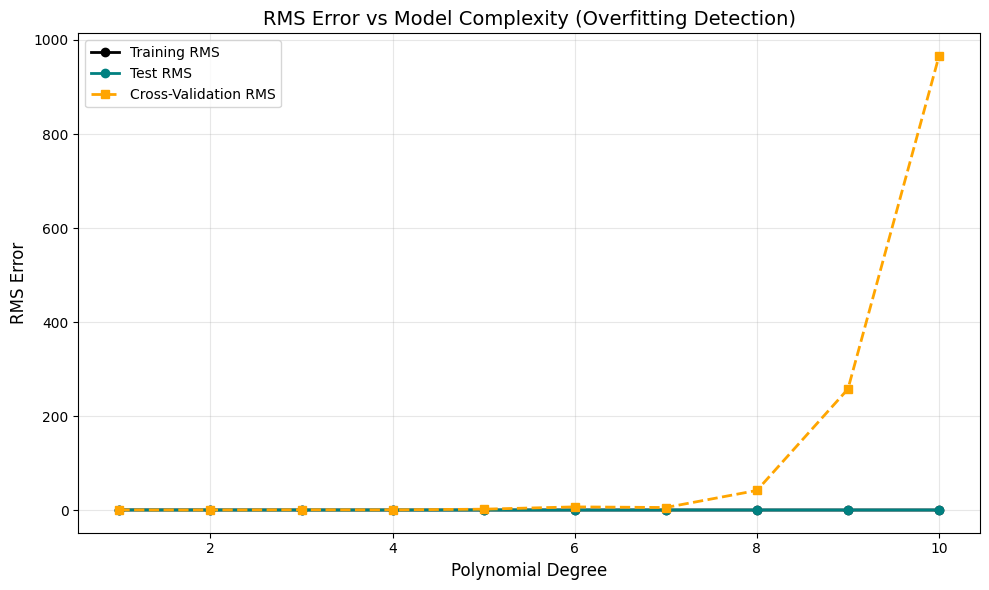


Best polynomial degree (minimum test RMS): 4
Test RMS at best degree: 0.8425

Best polynomial degree (minimum CV RMS): 2
CV RMS at best degree: 0.9479

RMS values for each degree:
Degree | Train RMS | Test RMS | CV RMS
---------------------------------------------
   1   |   1.0009  | 0.9479  | 1.0576
   2   |   0.9158  | 0.8670  | 0.9479
   3   |   0.9150  | 0.8704  | 1.3723
   4   |   0.8817  | 0.8425  | 1.1407
   5   |   0.8692  | 0.8734  | 2.6408
   6   |   0.8644  | 0.8903  | 7.5223
   7   |   0.8465  | 0.9026  | 6.1850
   8   |   0.8465  | 0.9026  | 42.4382
   9   |   0.8464  | 0.9078  | 257.9827
  10   |   0.8458  | 0.9166  | 965.8174


In [31]:
# Plot 3: RMS error as a function of polynomial degree to detect overfitting
# Using cross-validation for more robust estimates

from sklearn.model_selection import cross_val_score

degrees = range(1, 11)  # Test degrees from 1 to 10
train_rms = []
test_rms = []
cv_rms = []


print(f"Total data points: {len(x)}")
print(f"Training set size: {len(x_train)}")
print(f"Test set size: {len(x_test)}\n")

for degree in degrees:
    model = PolynomialRegression(degree)
    model.fit(x_train, y_train, dmu_train)
    
    # Predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Calculate RMS errors
    train_rms.append(np.sqrt(np.mean((y_train - y_train_pred)**2)))
    test_rms.append(np.sqrt(np.mean((y_test - y_test_pred)**2)))
    
    # Manual cross-validation (since we need to pass dmu)
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_errors = []
    
    for train_idx, val_idx in kf.split(x):
        x_cv_train, x_cv_val = x[train_idx], x[val_idx]
        y_cv_train, y_cv_val = y[train_idx], y[val_idx]
        dmu_cv_train = dmu[train_idx]
        
        model_cv = PolynomialRegression(degree)
        model_cv.fit(x_cv_train, y_cv_train, dmu_cv_train)
        y_cv_pred = model_cv.predict(x_cv_val)
        cv_errors.append(np.mean((y_cv_val - y_cv_pred)**2))
    
    cv_rms.append(np.sqrt(np.mean(cv_errors)))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_rms, 'o-', markersize=6, color='black', linewidth=2, label='Training RMS')
plt.plot(degrees, test_rms, 'o-', markersize=6, color='teal', linewidth=2, label='Test RMS')
plt.plot(degrees, cv_rms, 's--', markersize=6, color='orange', linewidth=2, label='Cross-Validation RMS')

plt.xlabel('Polynomial Degree', fontsize=12)
plt.ylabel('RMS Error', fontsize=12)
plt.title('RMS Error vs Model Complexity (Overfitting Detection)', fontsize=14)
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print the degree with minimum errors
best_degree_test = degrees[np.argmin(test_rms)]
best_degree_cv = degrees[np.argmin(cv_rms)]
print(f"\nBest polynomial degree (minimum test RMS): {best_degree_test}")
print(f"Test RMS at best degree: {min(test_rms):.4f}")
print(f"\nBest polynomial degree (minimum CV RMS): {best_degree_cv}")
print(f"CV RMS at best degree: {min(cv_rms):.4f}")
print(f"\nRMS values for each degree:")
print("Degree | Train RMS | Test RMS | CV RMS")
print("-" * 45)
for i, d in enumerate(degrees):
    print(f"  {d:2d}   |   {train_rms[i]:.4f}  | {test_rms[i]:.4f}  | {cv_rms[i]:.4f}")